# 9章 回帰

回帰分析: 変数$X$で変数$Y$を説明する

$X$ が $Y$ に影響していると想定

* $X$: 説明変数（独立変数）
* $Y$: 応答変数（従属変数）

例: 

* 孵化後のヒヨコの日齢（$X$）と体重（$Y$）
* 植物の日射時間（$X$）と生長量（$Y$）
* ある県の市町村の人口（$X$）と電気料金の自治体総額（$Y$）

線形回帰（直線回帰）: 関係性が線形（直線で表せる）

* 単回帰: 説明変数が1つの場合
* 重回帰: 2つ以上

* あるデータセット$X$ と $Y$ が線形の関係
* 最も当てはまりの良い直線（回帰直線）を求める
* 未知の$X$ から $Y$を予測する 

## 9.1 線形回帰と最小二乗法

データセット ($X_i$, $Y_i$) ($i=1, \cdots, n$)について，回帰直線を求める．
直線は，

$$y = a + bx$$

の形で表せるので，切片$a$と傾き$b$を求めたい．

説明変数 $X_i$に対して回帰直線上の$Y$を$\hat{Y}_i$とすると，次のようになる．

$$\hat{Y}_i = a + b X_i$$

回帰直線上の$\hat{Y}_i$と実際のデータ$Y_i$ との残差を $\epsilon_i = Y_i - \hat{Y}_i$ とする．

この残差の和が最小になるような，切片$a$と傾き$b$を求める．

実際には，二乗した和（残差平方和）を最小にすることを考える．

$$\sum\limits^n_{i=1}\epsilon_i^2 = \sum\limits^n_{i=1} (Y_i - \hat{Y}_i)^2$$

最も当てはまりのよい直線を求める

* 予測値と実際の値の乖離（残差）が最も少ない直線
* 残差の総和が最小になればよい
    * そのまま足すと 0
* 残差平方和が最小になればよい

パッケージ読み込み

In [1]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

図9.2 （a）年齢と血圧の関係

In [3]:
d1 <- data.frame(
    age = c(19, 23, 27, 35, 44, 51, 59, 66), 
    blood_pressure = c(124, 117, 120, 132, 128, 142, 143, 135)
)

In [5]:
options(repr.plot.width = 4, repr.plot.height=4)

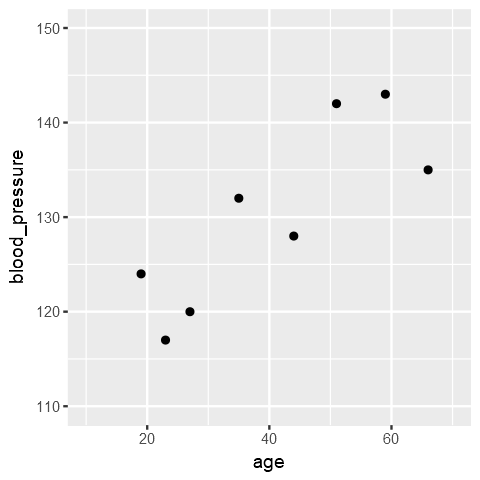

In [12]:
ggplot(d1, aes(age, blood_pressure)) + geom_point() + 
    scale_x_continuous(limits = c(10, 70)) + scale_y_continuous(limits=c(110, 150))

正規方程式で $a$ と $b$ を求める

In [22]:
b.d1 <- d1 %>% 
    mutate(x = age - mean(age), y = blood_pressure - mean(blood_pressure)) %>% 
    mutate(xy = x * y) %>% 
    summarise(SP.xy = sum(xy), SS.x = sum(x**2)) %>% 
    summarise(b = SP.xy / SS.x) %>% .[["b"]]
a.d1 <- with(mean(blood_pressure) - b.d1 * mean(age), data=d1)

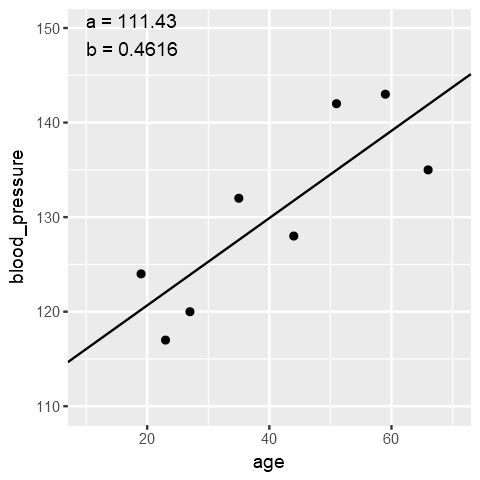

In [135]:
ggplot(d1, aes(age, blood_pressure)) + geom_point() + 
    scale_x_continuous(limits = c(10, 70)) + scale_y_continuous(limits=c(110, 150)) + 
    geom_abline(slope = b.d1, intercept = a.d1) + 
    annotate("text", x=10, y = 150, hjust=0, vjust=0, label=sprintf("a = %.2f", a.d1)) + 
    annotate("text", x=10, y = 147, hjust=0, vjust=0, label=sprintf("b = %.4f", b.d1))

## 9.2 回帰直線の残差分散と標準誤差

回帰直線が有意かどうか

* 帰無仮説「真の傾きが0である」を棄却できるかどうかを考える

図9.2（b） 年齢と血圧の関係

（a）と切片と傾きは似ているが，直線からの乖離が大きい

In [26]:
d2 <- data.frame(
    age = c(19, 23, 27, 35, 44, 51, 59, 66), 
    blood_pressure = c(111, 129, 113, 137, 147, 126, 135, 139)
)

In [27]:
b.d2 <- d2 %>% 
    mutate(x = age - mean(age), y = blood_pressure - mean(blood_pressure)) %>% 
    mutate(xy = x * y) %>% 
    summarise(SP.xy = sum(xy), SS.x = sum(x**2)) %>% 
    summarise(b = SP.xy / SS.x) %>% .[["b"]]
a.d2 <- with(mean(blood_pressure) - b.d2 * mean(age), data=d2)

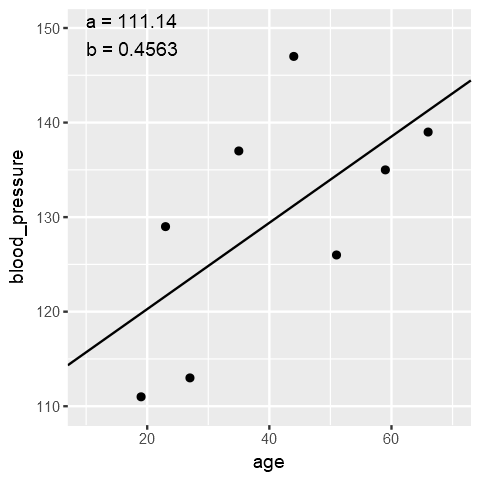

In [136]:
ggplot(d2, aes(age, blood_pressure)) + geom_point() + 
    scale_x_continuous(limits = c(10, 70)) + scale_y_continuous(limits=c(110, 150)) + 
    geom_abline(slope = b.d2, intercept = a.d2) + 
    annotate("text", x=10, y = 150, hjust=0, vjust=0, label=sprintf("a = %.2f", a.d2)) + 
    annotate("text", x=10, y = 147, hjust=0, vjust=0, label=sprintf("b = %.4f", b.d2))

図 9.2（c） （b） と同じデータをつなげたもの（サンプル数が2倍）

* 回帰直線の式は同じ

In [29]:
d3 <- bind_rows(d2, d2)
b.d3 <- d3 %>% 
    mutate(x = age - mean(age), y = blood_pressure - mean(blood_pressure)) %>% 
    mutate(xy = x * y) %>% 
    summarise(SP.xy = sum(xy), SS.x = sum(x**2)) %>% 
    summarise(b = SP.xy / SS.x) %>% .[["b"]]
a.d3 <- with(mean(blood_pressure) - b.d3 * mean(age), data=d3)

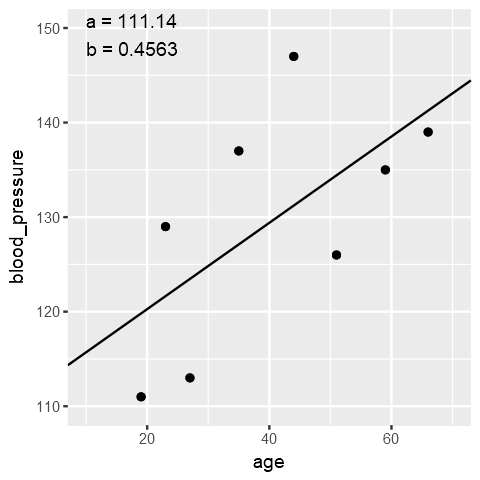

In [137]:
ggplot(d3, aes(age, blood_pressure)) + geom_point() + 
    scale_x_continuous(limits = c(10, 70)) + scale_y_continuous(limits=c(110, 150)) + 
    geom_abline(slope = b.d3, intercept = a.d3) + 
    annotate("text", x=10, y = 150, hjust=0, vjust=0, label=sprintf("a = %.2f", a.d3)) + 
    annotate("text", x=10, y = 147, hjust=0, vjust=0, label=sprintf("b = %.4f", b.d3))

Rで線形回帰をするには，`lm()` 関数を使う

（a）だと，

In [32]:
lm(blood_pressure ~ age, data = d1) %>% summary()


Call:
lm(formula = blood_pressure ~ age, data = d1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8956 -4.1819  0.0293  4.3551  7.0283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 111.4305     5.5588  20.046    1e-06 ***
age           0.4616     0.1275   3.622   0.0111 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.835 on 6 degrees of freedom
Multiple R-squared:  0.6861,	Adjusted R-squared:  0.6338 
F-statistic: 13.12 on 1 and 6 DF,  p-value: 0.01107


（b）

* 訂正: p128 l13: 回帰直線への適合度が高い -> 低い
* 傾きの有意確率: 0.0961
    * 帰無仮説を棄却できない

In [33]:
lm(blood_pressure ~ age, data = d2) %>% summary()


Call:
lm(formula = blood_pressure ~ age, data = d2)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.464  -8.516  -2.665   7.992  15.778 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 111.1430    10.0924  11.013 3.33e-05 ***
age           0.4563     0.2314   1.972   0.0961 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.59 on 6 degrees of freedom
Multiple R-squared:  0.3933,	Adjusted R-squared:  0.2922 
F-statistic: 3.889 on 1 and 6 DF,  p-value: 0.09607


（c）

* bより$p$値が低い
    * サンプル数の影響

In [34]:
lm(blood_pressure ~ age, data = d3) %>% summary()


Call:
lm(formula = blood_pressure ~ age, data = d3)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.464  -8.516  -2.665   7.992  15.778 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 111.1430     6.6070  16.822 1.11e-10 ***
age           0.4563     0.1515   3.012  0.00932 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.808 on 14 degrees of freedom
Multiple R-squared:  0.3933,	Adjusted R-squared:  0.3499 
F-statistic: 9.075 on 1 and 14 DF,  p-value: 0.009318


有意性を強める要因

1. 適合度の強さ（残差分散あるいは残差標準誤差の小ささ）
1. 標本サイズの増加

## 9.3 直線回帰の有意性検定の原理

回帰直線の適合度: 標準誤差（Residual standard error）

* 残差平方和を自由度で割り，平方根をとったもの

残差平方和

$$ \sum\limits^n_{i=1}(Y_i - \hat{Y}_i)^2 = \sum\limits^n_{i=1}[Y_i - (bX_i + a)]^2 $$

回帰の残差分散 $s^2$: 残差平方和 / 自由度．自由度は サンプル数 - パラメータ数（a, b） = n - 2

$$ s^2 = \frac{1}{n-2}\sum\limits^n_{i=1}[Y_i - (bX_i + a)]^2 $$

回帰の標準誤差 $s$: 残差平方和の平方根

$$ s = \sqrt{\frac{1}{n-2}\sum\limits^n_{i=1}[Y_i - (bX_i + a)]^2} $$

（a）だと，

In [41]:
d1 %>% 
    mutate(y_hat = age * b.d1 + a.d1) %>% 
    summarise(s = sqrt(sum((blood_pressure - y_hat)**2) / (n() - 2)))

s
5.834999


直線回帰の有意性検定

母集団における真の傾きを $\beta$ とすると，

* 帰無仮説: $\beta = 0$
* 対立仮説: $\beta \neq 0$

図9.3 両方とも有意ではない

* （a）: 傾きがほぼ0
* （b）: 傾きは0ではないが，ばらつきが大きい

### （1）$t$ 検定の場合

以下の統計量 $t$ が自由度$n-2$の$t$分布に従う

$$ t = \frac{(b - \beta)\sqrt{\sum\limits^n_{i=1}(X_i - \bar{X}_i)^2}}{s_\mathrm{e}} $$

ここで，$s_\mathrm{e}$ は回帰の標準誤差

a だと，

In [53]:
# t
d1 %>% summarise(t = b.d1 * sqrt(sum((age - mean(age))**2)) / 5.83)

t
3.624823


In [54]:
# p値
1 - pt(q = 3.62, df = 4)

[1] 0.0111786

### （2）分散分析の場合


1. 総平方和（total SS）
1. 回帰の平方和（regression SS）
1. 残差平方和（residual SS）
1. 個々の自由度
1. 回帰と残差の平均平方（MS）の比（F値）


* 総平方和（total SS）

実際のデータ点の平均値からの乖離

$$ \sum\limits^n_{i=1}(Y_i - \bar{Y}_i)^2 $$

In [56]:
# total SS
(SS.total <- with(sum((blood_pressure - mean(blood_pressure))**2), data = d1))

[1] 650.875

* 回帰の平方和（regression SS）

回帰で得られた予測値の，実際の平均値からの乖離

$$ \sum\limits^n_{i=1}(\hat{Y}_i - \bar{Y}_i)^2 $$

In [58]:
# regression SS
(SS.reg <- with(sum(((age * b.d1 + a.d1 - mean(blood_pressure)))**2), data = d1))

[1] 446.5917

* 残差平方和（residual SS）

実際のデータ点と予測値との乖離


$$ \sum\limits^n_{i=1}(Y_i - \hat{Y}_i)^2 $$

In [59]:
# residual SS
(SS.res <- with(sum((blood_pressure - (age * b.d1 + a.d1))**2), data=d1))

[1] 204.2833

総平方和 = 回帰平方和 + 残差平方和

In [146]:
identical(all.equal(SS.total, SS.reg + SS.res), TRUE)

[1] TRUE

### 自由度

In [72]:
# degree of freedom
## total
df.total <- nrow(d1) - 1
## regression
df.reg <- 1
## residual
df.res <- nrow(d1) - 2

### F値

$$ F = \frac{\text{regression MS}}{\text{residual MS}} = \frac{\text{regression SS / df}}{\text{residual SS / df}} $$

* 総平方和のどれだけを回帰平方和で説明できているか

In [61]:
# F value
(f_val <- (SS.reg / df.reg) / (SS.res / df.res))

[1] 13.11684

In [63]:
# p value
1 - pf(q = 13.12, df1 = 1, df2 = 6)

[1] 0.01106859

## 9.4 決定係数 $r^2$

説明変数$X$ が応答変数$Y$をどれだけ説明しているかを表す．寄与率とも言う．

$$ r^2 \equiv 1 - \frac{\sum\limits^n_{i = 1}(Y_i - \hat{Y}_i)^2}{\sum\limits^n_{i = 1}(Y_i - \bar{Y}_i)^2} $$

つまり，

$$r^2 \equiv 1 - \frac{\text{残差平方和}}{\text{総平方和}} = \frac{回帰平方和}{総平方和}$$

さっきのF値は，

$$ F = \frac{回帰平方和 / 1}{残差平方和 / n-2} = \frac{r^2}{(1-r^2) / (n-2)}$$

決定係数を求めると，

In [64]:
# Multiple R-squared
1 - (SS.res / SS.total)

[1] 0.6861405

Adjusted R-squared は，自由度調整済み決定係数

In [73]:
# Adjusted R-squared
1 - (SS.res / df.res) / (SS.total / df.total)

[1] 0.6338306

## 9.5 直線回帰の事例

（1）親の結婚年数と子の結婚年数

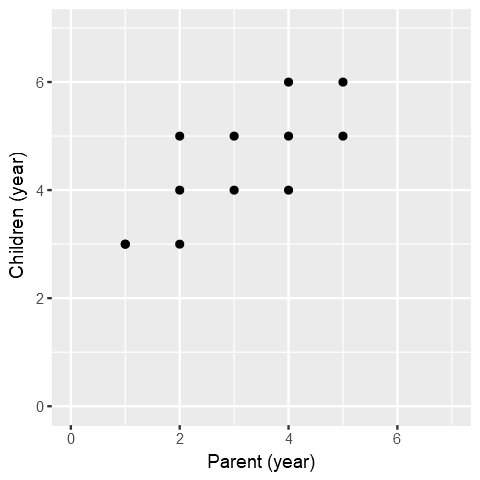

In [83]:
d4 <- data.frame(
    x = c(1,2,4,5,3,2,3,1,5,4,4,2),
    y = c(3,4,4,5,5,3,4,3,6,6,5,5)
)
gp.d4 <- ggplot(d4, aes(x, y)) + geom_point() + xlim(0, 7) + ylim(0, 7) + xlab("Parent (year)") + ylab("Children (year)")
gp.d4

In [79]:
res.d4 <- lm(y ~ x, data=d4)
res.d4 %>% summary()


Call:
lm(formula = y ~ x, data = d4)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0076 -0.4621 -0.1212  0.4470  1.1742 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6439     0.5077   5.208 0.000397 ***
x             0.5909     0.1543   3.831 0.003315 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7235 on 10 degrees of freedom
Multiple R-squared:  0.5947,	Adjusted R-squared:  0.5542 
F-statistic: 14.67 on 1 and 10 DF,  p-value: 0.003315


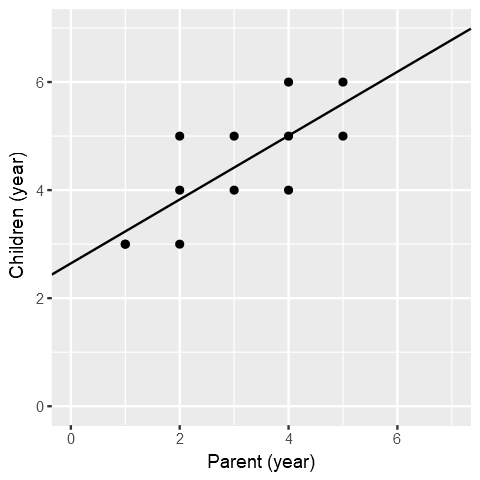

In [84]:
gp.d4 + geom_abline(slope = coef(res.d4)[["x"]], intercept = coef(res.d4)[["(Intercept)"]])

（2）雀の雛の成長（日齢と羽根の長さ）

In [85]:
d5 <- data.frame(
    x = c(3,4,5,6,8,9,10,11,12,14,15,16,17), 
    y = c(1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5)
)

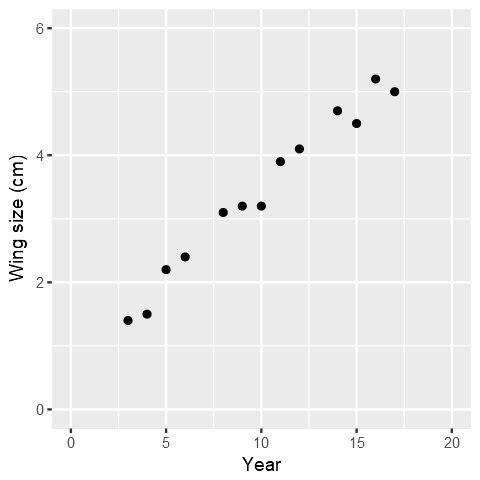

In [87]:
gp.d5 <- ggplot(d5, aes(x, y)) + geom_point() + xlim(0, 20) + ylim(0, 6) + xlab("Year") + ylab("Wing size (cm)")
gp.d5

In [88]:
res.d5 <- lm(y ~ x, data=d5)
summary(res.d5)


Call:
lm(formula = y ~ x, data = d5)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30699 -0.21538  0.06553  0.16324  0.22507 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.71309    0.14790   4.821 0.000535 ***
x            0.27023    0.01349  20.027 5.27e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2184 on 11 degrees of freedom
Multiple R-squared:  0.9733,	Adjusted R-squared:  0.9709 
F-statistic: 401.1 on 1 and 11 DF,  p-value: 5.267e-10


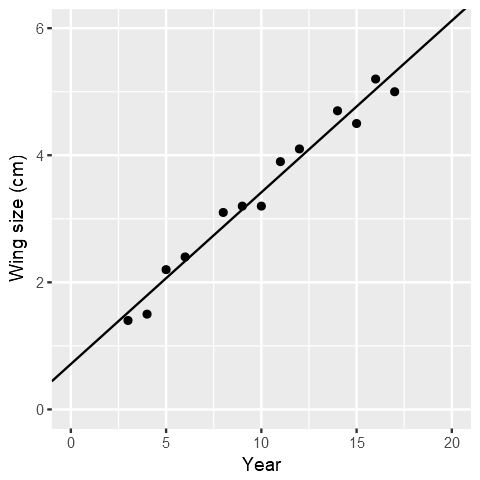

In [89]:
gp.d5 +  geom_abline(slope = coef(res.d5)[["x"]], intercept = coef(res.d5)[["(Intercept)"]])

## 9.6 回帰直線の95%信頼区間と95%予測区間

求めた回帰直線にどれぐらいの誤差があるかを考える．

回帰直線 $y =  ax + b$ について， $X^\ast$ における推定値 $\hat{Y}^\ast$ を計算したとき，
回帰式の $100 (1 - \alpha)$ % 信頼区間は，

$$ \hat{Y}^\ast \pm t_{(n-2, \alpha / 2)} s_e \sqrt{\frac{1}{n} + \frac{(X^\ast - \bar{X}^\ast)^2}{\sum^n_{i=1}(X_i - \bar{X})^2}} $$

ここで，

* $t_{(n-2, \alpha / 2)}$: 自由度 $n-2$の$t$分布の上側 $\alpha/2$ %点
* $s_e$ 回帰の標準誤差

In [90]:
predict(res.d5, interval="confidence")

,fit,lwr,upr
1,1.523782,1.276815,1.770748
2,1.794011,1.571465,2.016556
3,2.064240,1.864678,2.263801
4,2.334469,2.155899,2.513038
5,2.874927,2.728970,3.020883
6,3.145156,3.008564,3.281747
7,3.415385,3.282061,3.548709
8,3.685614,3.549022,3.822205
9,3.955843,3.809886,4.101799
10,4.496301,4.317731,4.674870


In [108]:
d5.conf <- predict(res.d5, interval="confidence") %>% as.data.frame()
d5.conf

fit,lwr,upr
1.523782,1.276815,1.770748
1.794011,1.571465,2.016556
2.064240,1.864678,2.263801
2.334469,2.155899,2.513038
2.874927,2.728970,3.020883
3.145156,3.008564,3.281747
3.415385,3.282061,3.548709
3.685614,3.549022,3.822205
3.955843,3.809886,4.101799
4.496301,4.317731,4.674870


* 両端で広がる -> 平均値からの偏差の影響
* 「ランダムサンプリングによってデータを得て回帰直線を推定したら，真の回帰直線は20回に19回はこの範囲を通る」

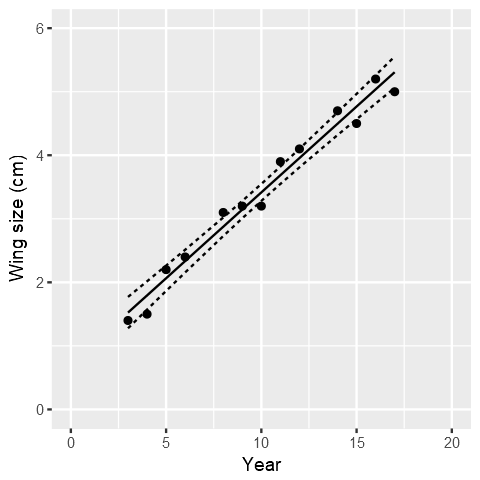

In [109]:
ggplot(bind_cols(d5, d5.conf)) + 
    geom_point(mapping =aes(x, y)) + 
    geom_line(mapping=aes(x, upr), linetype="dashed") + 
    geom_line(mapping=aes(x, fit)) + 
    geom_line(mapping=aes(x, lwr), linetype="dashed") + 
    xlim(0, 20) + ylim(0, 6) + xlab("Year") + ylab("Wing size (cm)")

回帰の95%予測区間: データプロットの95%が含まれる

$$ \hat{Y}^\ast \pm t_{(n-2, \alpha / 2)} s_e \sqrt{1 + \frac{1}{n} + \frac{(X^\ast - \bar{X})^2}{\sum^n_{i=1}(X_i - \bar{X})^2}}$$

In [113]:
d5.pred <- predict(res.d5, interval="prediction") %>% as.data.frame()
d5.pred

Warning message in predict.lm(res.d5, interval = "prediction"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
1.523782,0.9833454,2.064218
1.794011,1.2642884,2.323733
2.064240,1.5437554,2.584724
2.334469,1.8216666,2.847271
2.874927,2.3725501,3.377303
3.145156,2.6454195,3.644892
3.415385,2.9165317,3.914238
3.685614,3.1858775,4.185350
3.955843,3.4534661,4.458219
4.496301,3.9834986,5.009103


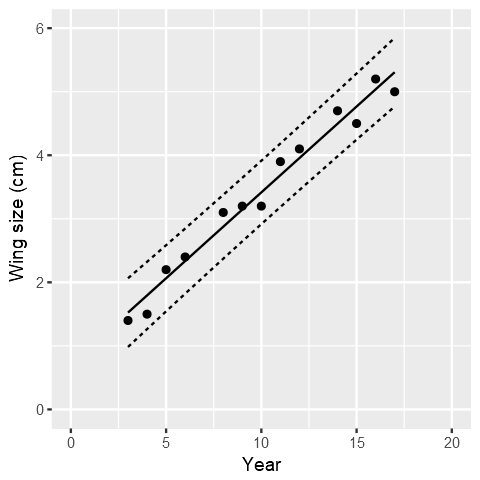

In [114]:
ggplot(bind_cols(d5, d5.pred)) + 
    geom_point(mapping =aes(x, y)) + 
    geom_line(mapping=aes(x, upr), linetype="dashed") + 
    geom_line(mapping=aes(x, fit)) + 
    geom_line(mapping=aes(x, lwr), linetype="dashed") + 
    xlim(0, 20) + ylim(0, 6) + xlab("Year") + ylab("Wing size (cm)")

## 9.7 まとめ

単回帰分析で扱えるデータは限られる

* 複数の説明変数で表されるデータセットもある -> 重回帰
* 誤差構造が正規分布に従わないこともある -> 一般化線形モデル

## 演習問題

光化学スモッグ発生回数と正午に30℃を超えた日数の関係

In [116]:
d.ex <- data.frame(
    nsmog = c(91, 70, 103, 79, 86, 114, 101, 82, 75, 87), 
    n30 = c(14, 5, 28, 17, 15, 19, 20, 7, 10, 9)
)

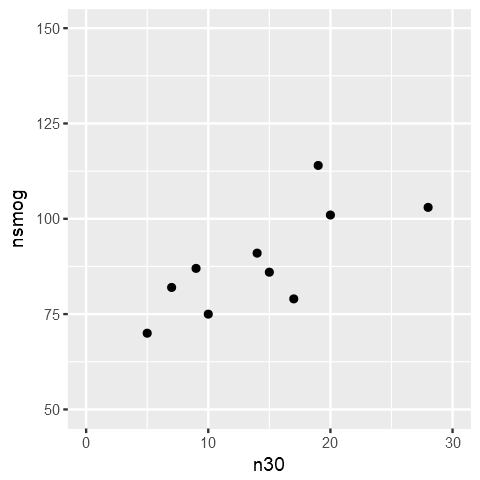

In [118]:
ggplot(d.ex, aes(n30, nsmog)) + geom_point() + xlim(0, 30) + ylim(50, 150)

In [120]:
res.ex <- lm(nsmog ~ n30, data=d.ex)
summary(res.ex)


Call:
lm(formula = nsmog ~ n30, data = d.ex)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6535  -5.6847  -0.4482   4.1008  18.3822 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  67.4574     7.2394   9.318 1.43e-05 ***
n30           1.4821     0.4569   3.244   0.0118 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.546 on 8 degrees of freedom
Multiple R-squared:  0.568,	Adjusted R-squared:  0.5141 
F-statistic: 10.52 on 1 and 8 DF,  p-value: 0.01181


In [121]:
d.ex.conf <- predict(res.ex, interval="confidence") %>% as.data.frame()

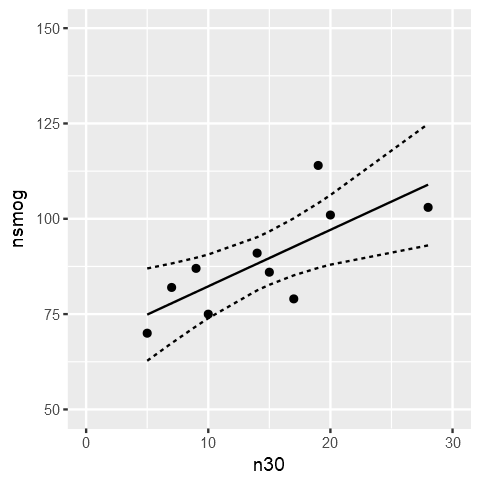

In [123]:
ggplot(bind_cols(d.ex, d.ex.conf)) + 
    geom_point(aes(n30, nsmog)) + xlim(0, 30) + ylim(50, 150) + 
    geom_line(aes(n30, upr), linetype="dashed") + 
    geom_line(aes(n30, fit)) + 
    geom_line(aes(n30, lwr), linetype="dashed")

In [124]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.3.2 (2016-10-31)
 system   x86_64, mingw32             
 ui       RTerm                       
 language en_US.UTF-8                 
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2017-06-25                  

 package    * version    date       source                            
 assertthat   0.2.0      2017-04-11 CRAN (R 3.3.2)                    
 bindr        0.1        2016-11-13 CRAN (R 3.3.3)                    
 bindrcpp   * 0.1        2016-12-11 CRAN (R 3.3.3)                    
 Cairo        1.5-9      2015-09-26 CRAN (R 3.2.2)                    
 colorspace   1.3-2      2016-12-14 CRAN (R 3.3.3)                    
 crayon       1.3.2      2016-06-28 CRAN (R 3.3.1)                    
 devtools     1.12.0     2016-06-24 CRAN (R 3.3.1)                    
 digest       0.6.12     2017-01-27 CRAN (R 3.3.3)                    
 dplyr      * 0.7.0      2017-06-09 CRAN (R 3.3.